## 数据读取

### 步骤 1	导入常用库

In [2]:
# sklearn是Python的一个强力的机器学习第三方库，包含了从数据预处理到训练模型的各方面内容。
# sklearn库中大部分函数分为估计器（Estimator）和转化器（Transformer）两类。
# Estimator相当于建模，用于对数据的预测，常用函数有fit(x,y)，predict(x)。
# Transformer用于对数据的处理，如降维、标准化等，常用函数有transform(x)，transform(x,y)。
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline


### 步骤 2	从本地磁盘读取数据

In [3]:

# 地址为数据集所在磁盘位置。
temp = pd.read_csv("./data/1429_1.csv",encoding='utf-8',engine='python')


### 步骤 3	可视化数据

In [4]:

# 读取数据前五行，查看数据属性列。
temp.head()

# 实验仅需用到reviews.rating、reviews.text、reviews.username和reviews.title4个属性列，
# 因此需要对数据集做二次提取，只保留这4列属性数据，并命名为permanent，以便后续实验。
permanent = temp[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
# 缺失值查看：
print(permanent.isnull().sum()) 
permanent.head()


reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
dtype: int64


,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


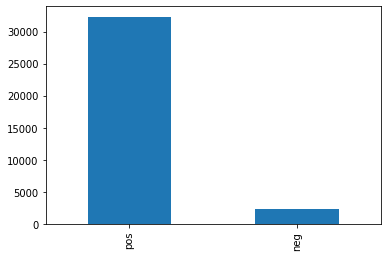

In [13]:
# 情感分析中，reviews.rating非常重要，不能缺失。数据集共有34756条数据，考虑到数据量较为可观，因此可将reviews.rating有缺失值的数据删除。
# 将不含reviews.rating缺失值的数据提取，命名成senti。有reviews.rating缺失值的部分数据单独命名为check。
check =  permanent[permanent["reviews.rating"].isnull()]
senti= permanent[permanent["reviews.rating"].notnull()]
# 对于如何处理打分问题，本实验将reviews.rating大于或等于4，定义为积极(pos)，相反为消极(neg)，并将reviews.rating属性列重新命名为senti列。
# 	replace(x,y)：表示y替换x。
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])
# 极性处理后并可视化数据。
senti["senti"].value_counts().plot.bar()

## 数据处理

### 步骤 4	导入相关包

In [14]:

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk


### 步骤 5	数据预处理

In [1]:

# 文本数据包含空格、标点符号、数据等。本案例侧重于文字(英文)分析，因此需将非字母之外的信息删除。
# 定义一个cleanup()函数，通过正则表达式删除非字母字符，使用lower()函数将大小写字母统一成小写字母，删除空白符，包括'\n', '\r', '\t', ' '。
# reviews.text属性应用此函数后，保存为summary_clean列。
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence
senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)
check["Summary_Clean"] = check["reviews.text"].apply(cleanup)


NameError: name 're' is not defined

### 步骤 6	生成训练集、测试集

In [16]:

# 取senti数据集中的["Summary_Clean","senti"]，保存为split。
split = senti[["Summary_Clean" , "senti"]]

# 使用split.sample()将split中80%的数据集做为训练集，使用drop()去除split中已经出现在训练集train中的数据，剩余数据作为测试集test。
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)
